## 파이썬 고급
# Numpy 정렬

- 데이터를 섞기 <---> 데이터를 정렬하기
- np.sort() : 정렬 함수
- np.argsort(), np.lexsort() : 결과로 정렬한 데이터의 위치값들을 넘긴다
- np.argmin(), np.argmax() : 최소 최대값의 위치값을 넘긴다
- np.where() : 조건에 맞는 데이터의 위치 정보를 넘긴다. 또는 조건에 맞게 데이터를 수정한다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### sort() 함수
- 기본은 옆으로 정렬한다

In [2]:
a = np.random.randint(10,size=10)
a

array([8, 8, 0, 5, 6, 0, 8, 6, 8, 8])

In [3]:
a.sort() # a 가 수정된다

In [4]:
a

array([0, 0, 5, 6, 6, 8, 8, 8, 8, 8])

In [7]:
help(a.sort)

Help on built-in function sort:

sort(...) method of numpy.ndarray instance
    a.sort(axis=-1, kind='quicksort', order=None)
    
    Sort an array, in-place.
    
    Parameters
    ----------
    axis : int, optional
        Axis along which to sort. Default is -1, which means sort along the
        last axis.
    kind : {'quicksort', 'mergesort', 'heapsort', 'stable'}, optional
        Sorting algorithm. Default is 'quicksort'.
    order : str or list of str, optional
        When `a` is an array with fields defined, this argument specifies
        which fields to compare first, second, etc.  A single field can
        be specified as a string, and not all fields need be specified,
        but unspecified fields will still be used, in the order in which
        they come up in the dtype, to break ties.
    
    See Also
    --------
    numpy.sort : Return a sorted copy of an array.
    argsort : Indirect sort.
    lexsort : Indirect stable sort on multiple keys.
    searchsorted :

In [10]:
a[2:6:2]

array([5, 6])

In [5]:
a[::-1] # 내림차순

array([8, 8, 8, 8, 8, 6, 6, 5, 0, 0])

In [8]:
a = np.random.randint(10,size=10)
a

array([6, 9, 5, 6, 8, 4, 5, 7, 3, 4])

In [11]:
a2 = np.sort(a) # a 는 변하지 않는다
a2

array([3, 4, 4, 5, 5, 6, 6, 7, 8, 9])

In [10]:
a

array([6, 9, 5, 6, 8, 4, 5, 7, 3, 4])

In [13]:
a = np.random.randint(25, size=[5,5])
a

array([[12,  5, 14, 15,  4],
       [ 4, 11, 22, 14, 19],
       [10, 11, 14, 17, 17],
       [15,  9, 20, 21,  7],
       [12, 24, 13,  3, 22]])

In [14]:
np.sort(a) # 옆으로 정렬 (axis=1)

array([[ 4,  5, 12, 14, 15],
       [ 4, 11, 14, 19, 22],
       [10, 11, 14, 17, 17],
       [ 7,  9, 15, 20, 21],
       [ 3, 12, 13, 22, 24]])

In [15]:
np.sort(a, axis=0) # 아래로 정렬 (axis=0)

array([[ 4,  5, 13,  3,  4],
       [10,  9, 14, 14,  7],
       [12, 11, 14, 15, 17],
       [12, 11, 20, 17, 19],
       [15, 24, 22, 21, 22]])

### 하나의 칼럼(속성)을 기준으로 정렬하기
- np.argsort()
- np.lexsort()

줄단위로 먼저 줄번호를 정렬한 다음, 도출된 인덱스를 기반으로 원본 데이터를 인덱싱한다

In [11]:
a = np.random.randint(25, size=[5,5])
a

array([[ 0, 18, 17, 23,  8],
       [21,  0, 10, 21, 16],
       [20, 14, 16,  7, 23],
       [ 0,  7, 17,  6, 17],
       [ 6, 16, 11, 11, 10]])

In [14]:
a[ [0,1] ]

array([[ 0, 18, 17, 23,  8],
       [21,  0, 10, 21, 16]])

In [15]:
a[:, [1,2,3] ]

array([[18, 17, 23],
       [ 0, 10, 21],
       [14, 16,  7],
       [ 7, 17,  6],
       [16, 11, 11]])

In [16]:
a[ [2,4,0,1,3] ]

array([[20, 14, 16,  7, 23],
       [ 6, 16, 11, 11, 10],
       [ 0, 18, 17, 23,  8],
       [21,  0, 10, 21, 16],
       [ 0,  7, 17,  6, 17]])

In [17]:
a[ :, [2,4,0,1,3] ]

array([[17,  8,  0, 18, 23],
       [10, 16, 21,  0, 21],
       [16, 23, 20, 14,  7],
       [17, 17,  0,  7,  6],
       [11, 10,  6, 16, 11]])

In [21]:
a

array([[ 0, 18, 17, 23,  8],
       [21,  0, 10, 21, 16],
       [20, 14, 16,  7, 23],
       [ 0,  7, 17,  6, 17],
       [ 6, 16, 11, 11, 10]])

In [20]:
col_last = a[:,-1]
col_last

array([ 8, 16, 23, 17, 10])

In [19]:
np.sort(col_last)

array([ 8, 10, 16, 17, 23])

- np.argsort() : 정렬된 데이터의 원본 위치값을 넘긴다

In [22]:
np.argsort(col_last)

array([0, 4, 1, 3, 2], dtype=int64)

In [10]:
a[np.argsort(col_last)]

array([[ 4,  9,  4, 22,  7],
       [19, 24, 22,  9,  9],
       [ 2,  2, 15,  2, 11],
       [ 5,  7, 22, 10, 13],
       [20,  2, 14, 17, 15]])

In [11]:
a[np.argsort(a[:,-1])]

array([[ 4,  9,  4, 22,  7],
       [19, 24, 22,  9,  9],
       [ 2,  2, 15,  2, 11],
       [ 5,  7, 22, 10, 13],
       [20,  2, 14, 17, 15]])

#### 사례
```
X = wine[:,:-1]
y = wine[:, -1]

X[np.argsort(y)]
```

In [24]:
wine = np.loadtxt('winequality-red.csv', delimiter=';', skiprows=1)
wine

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [26]:
X = wine[:,:-1]
y = wine[:,-1]
print(y)

[5. 5. 5. ... 6. 5. 6.]


In [28]:
wine[np.argsort(y)]

array([[ 7.1  ,  0.875,  0.05 , ...,  0.52 , 10.2  ,  3.   ],
       [10.4  ,  0.44 ,  0.42 , ...,  0.86 ,  9.9  ,  3.   ],
       [ 8.3  ,  1.02 ,  0.02 , ...,  0.49 , 11.   ,  3.   ],
       ...,
       [10.   ,  0.26 ,  0.54 , ...,  0.63 , 11.8  ,  8.   ],
       [ 7.2  ,  0.38 ,  0.31 , ...,  0.76 , 11.3  ,  8.   ],
       [ 7.4  ,  0.36 ,  0.3  , ...,  0.7  , 11.4  ,  8.   ]])

In [31]:
wine[np.argsort(wine[:,1])]

array([[ 8.9 ,  0.12,  0.45, ...,  0.76, 11.9 ,  7.  ],
       [ 8.9 ,  0.12,  0.45, ...,  0.76, 11.9 ,  7.  ],
       [ 8.9 ,  0.12,  0.45, ...,  0.76, 11.9 ,  7.  ],
       ...,
       [ 8.2 ,  1.33,  0.  , ...,  0.49, 10.9 ,  5.  ],
       [ 8.1 ,  1.33,  0.  , ...,  0.48, 10.9 ,  5.  ],
       [ 7.6 ,  1.58,  0.  , ...,  0.4 , 10.9 ,  3.  ]])

In [32]:
wine[np.argsort(wine[:,0] + wine[:,1])]

array([[ 4.6  ,  0.52 ,  0.15 , ...,  0.56 , 13.1  ,  4.   ],
       [ 4.7  ,  0.6  ,  0.17 , ...,  0.6  , 12.9  ,  6.   ],
       [ 4.9  ,  0.42 ,  0.   , ...,  0.74 , 14.   ,  7.   ],
       ...,
       [15.6  ,  0.645,  0.49 , ...,  0.74 , 11.1  ,  5.   ],
       [15.9  ,  0.36 ,  0.65 , ...,  0.84 , 14.9  ,  5.   ],
       [15.6  ,  0.685,  0.76 , ...,  0.68 , 11.2  ,  7.   ]])

In [33]:
wine[np.argsort(X.mean(axis=1))]

array([[ 7.   ,  0.59 ,  0.   , ...,  0.47 , 10.3  ,  5.   ],
       [ 6.6  ,  0.61 ,  0.   , ...,  0.37 , 10.4  ,  4.   ],
       [ 7.9  ,  0.885,  0.03 , ...,  0.33 ,  9.1  ,  4.   ],
       ...,
       [ 5.9  ,  0.29 ,  0.25 , ...,  0.54 , 10.3  ,  6.   ],
       [ 7.9  ,  0.3  ,  0.68 , ...,  0.51 , 12.3  ,  7.   ],
       [ 7.9  ,  0.3  ,  0.68 , ...,  0.51 , 12.3  ,  7.   ]])

In [26]:
a

array([[12,  5, 14, 15,  4],
       [ 4, 11, 22, 14, 19],
       [10, 11, 14, 17, 17],
       [15,  9, 20, 21,  7],
       [12, 24, 13,  3, 22]])

In [27]:
names = ['홍길동', '장길산', '이순신', '김유신', '한음'] # 각 줄에 이름을 단다
a[np.argsort(names)]

array([[15,  9, 20, 21,  7],
       [10, 11, 14, 17, 17],
       [ 4, 11, 22, 14, 19],
       [12, 24, 13,  3, 22],
       [12,  5, 14, 15,  4]])

In [28]:
np.sort(names)

array(['김유신', '이순신', '장길산', '한음', '홍길동'], dtype='<U3')

In [30]:
np.argsort(names)

array([3, 2, 1, 4, 0], dtype=int64)

> **연습문제**<br>
> Iris 데이터를 첫번째 칼럼 기준으로 정렬하시오<br>
> 정렬된 데이터의 4가지 속성을 plt.plot() 함수를 이용하여 4가지 직선으로 시각화 하시오.

```
iris[]
iris[np.argsort()]
iris[np.argsort(iris[:,0])]
```

In [21]:
f = open('iris.csv')

line = f.readline()
features = line.strip().split(',')[:4]

labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

data = []
for line in f:
    l = line.strip().split(',')
    l[:4] = [float(i) for i in l[:4]]
    l[4] = labels.index(l[4])
    
    data.append(l)

f.close()

iris = np.array(data)

In [33]:
iris2 = iris[np.argsort(iris[:,0])]

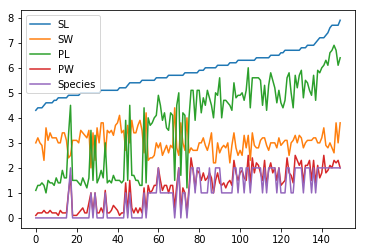

In [35]:
plt.plot(iris2)
plt.legend(['SL','SW','PL','PW','Species'])

- lexsort() 는 뒤의 인자를 먼저 기준을 잡아 정렬한다
- 정렬된 인덱스를 반환한다

In [4]:
a = np.random.randint(5, size=[10,4])
print(a)
np.lexsort([a[:,1],a[:,0]]) # 칼럼0 -> 칼럼1 순으로 정렬한 인덱스를 반환한다

[[1 4 2 1]
 [2 3 3 0]
 [1 2 3 1]
 [2 4 0 0]
 [1 1 2 0]
 [4 4 4 0]
 [2 2 4 3]
 [2 1 4 0]
 [1 2 1 3]
 [2 4 1 3]]


array([4, 2, 8, 0, 7, 6, 1, 3, 9, 5], dtype=int64)

In [5]:
a[np.lexsort([a[:,1],a[:,0]])]

array([[1, 1, 2, 0],
       [1, 2, 3, 1],
       [1, 2, 1, 3],
       [1, 4, 2, 1],
       [2, 1, 4, 0],
       [2, 2, 4, 3],
       [2, 3, 3, 0],
       [2, 4, 0, 0],
       [2, 4, 1, 3],
       [4, 4, 4, 0]])

- np.argmax(), np.argmin() 함수도 있다

In [12]:
a = np.random.randint(10, size=[5,5])
a

array([[2, 2, 4, 9, 5],
       [8, 0, 2, 6, 7],
       [8, 7, 7, 6, 1],
       [2, 2, 8, 1, 6],
       [7, 3, 7, 2, 9]])

In [13]:
np.argmax(a)

3

In [14]:
np.argmin(a)

6

In [15]:
np.argmax(a,axis=0)

array([1, 2, 3, 0, 4], dtype=int64)

In [16]:
np.argmin(a, axis=0)

array([0, 1, 1, 3, 2], dtype=int64)

### np.where() 함수
- 조건에 맞는 인덱스를 반환한다
- 또는, 조건에 따라 값을 할당한다
> 교재 140쪽

In [12]:
a = np.random.randint(10, size=[5,5])
a

array([[0, 2, 3, 8, 3],
       [4, 5, 7, 3, 4],
       [8, 7, 1, 6, 3],
       [4, 0, 4, 6, 8],
       [2, 4, 7, 8, 9]])

In [13]:
np.where(a<5)
# ((0,2), (0,4), (1,0), ....)

(array([0, 0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4], dtype=int64),
 array([0, 1, 2, 4, 0, 3, 4, 2, 4, 0, 1, 2, 0, 1], dtype=int64))

- 위와 같이, np.where() 는 어레이가 2개인 튜플로 결과값을 넘긴다. 튜플의 첫번째 어레이는 **행번호**, 두번째 어레이는 **열번호** 이다.

In [14]:
a[np.where(a<5)]

array([0, 2, 3, 3, 4, 3, 4, 1, 3, 4, 0, 4, 2, 4])

In [15]:
a[   ([0, 0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4],
 [0, 1, 2, 4, 0, 3, 4, 2, 4, 0, 1, 2, 0, 1])  ]

array([0, 2, 3, 3, 4, 3, 4, 1, 3, 4, 0, 4, 2, 4])

In [16]:
a

array([[0, 2, 3, 8, 3],
       [4, 5, 7, 3, 4],
       [8, 7, 1, 6, 3],
       [4, 0, 4, 6, 8],
       [2, 4, 7, 8, 9]])

In [17]:
# 마지막 칼럼에서 5보다 작은 줄번호를 알아낸다
np.where(a[:,-1]<5)

(array([0, 1, 2], dtype=int64),)

In [18]:
np.where(a[:,-1]<5)[0]

array([0, 1, 2], dtype=int64)

In [19]:
a[np.where(a[:,-1]<5)[0]]

array([[0, 2, 3, 8, 3],
       [4, 5, 7, 3, 4],
       [8, 7, 1, 6, 3]])

In [22]:
iris[ iris[:,-1]==1 ]

array([[7. , 3.2, 4.7, 1.4, 1. ],
       [6.4, 3.2, 4.5, 1.5, 1. ],
       [6.9, 3.1, 4.9, 1.5, 1. ],
       [5.5, 2.3, 4. , 1.3, 1. ],
       [6.5, 2.8, 4.6, 1.5, 1. ],
       [5.7, 2.8, 4.5, 1.3, 1. ],
       [6.3, 3.3, 4.7, 1.6, 1. ],
       [4.9, 2.4, 3.3, 1. , 1. ],
       [6.6, 2.9, 4.6, 1.3, 1. ],
       [5.2, 2.7, 3.9, 1.4, 1. ],
       [5. , 2. , 3.5, 1. , 1. ],
       [5.9, 3. , 4.2, 1.5, 1. ],
       [6. , 2.2, 4. , 1. , 1. ],
       [6.1, 2.9, 4.7, 1.4, 1. ],
       [5.6, 2.9, 3.6, 1.3, 1. ],
       [6.7, 3.1, 4.4, 1.4, 1. ],
       [5.6, 3. , 4.5, 1.5, 1. ],
       [5.8, 2.7, 4.1, 1. , 1. ],
       [6.2, 2.2, 4.5, 1.5, 1. ],
       [5.6, 2.5, 3.9, 1.1, 1. ],
       [5.9, 3.2, 4.8, 1.8, 1. ],
       [6.1, 2.8, 4. , 1.3, 1. ],
       [6.3, 2.5, 4.9, 1.5, 1. ],
       [6.1, 2.8, 4.7, 1.2, 1. ],
       [6.4, 2.9, 4.3, 1.3, 1. ],
       [6.6, 3. , 4.4, 1.4, 1. ],
       [6.8, 2.8, 4.8, 1.4, 1. ],
       [6.7, 3. , 5. , 1.7, 1. ],
       [6. , 2.9, 4.5, 1.5, 1. ],
       [5.7, 2

In [17]:
a

array([[2, 2, 4, 9, 5],
       [8, 0, 2, 6, 7],
       [8, 7, 7, 6, 1],
       [2, 2, 8, 1, 6],
       [7, 3, 7, 2, 9]])

- np.where() 에서 두번째, 세번째 인자로 값을 설정할 수 있다.

In [18]:
np.where(a<5, 0, 1)

array([[0, 0, 0, 1, 1],
       [1, 0, 0, 1, 1],
       [1, 1, 1, 1, 0],
       [0, 0, 1, 0, 1],
       [1, 0, 1, 0, 1]])

In [19]:
np.where(a<5, 0, a)

array([[0, 0, 0, 9, 5],
       [8, 0, 0, 6, 7],
       [8, 7, 7, 6, 0],
       [0, 0, 8, 0, 6],
       [7, 0, 7, 0, 9]])

In [20]:
np.where(a<5, 5, a)

array([[5, 5, 5, 9, 5],
       [8, 5, 5, 6, 7],
       [8, 7, 7, 6, 5],
       [5, 5, 8, 5, 6],
       [7, 5, 7, 5, 9]])

In [22]:
np.where(a<2, 2, np.where(a>7, 7, a)) # np.where 을 중첩해서 사용할 수 있다.

array([[2, 2, 4, 7, 5],
       [7, 2, 2, 6, 7],
       [7, 7, 7, 6, 2],
       [2, 2, 7, 2, 6],
       [7, 3, 7, 2, 7]])

In [26]:
n = 999
print(-1 if n<0 else (1 if n>0 else 0))

1


- np.maximum() 은 어레이나 숫자 두 가지를 비교하여 큰 값으로 값을 설정한다.

In [51]:
np.maximum(a,5)

array([[8, 5, 8, 7, 5],
       [6, 9, 5, 9, 5],
       [5, 7, 6, 5, 5],
       [9, 8, 5, 5, 5],
       [5, 5, 7, 5, 8]])

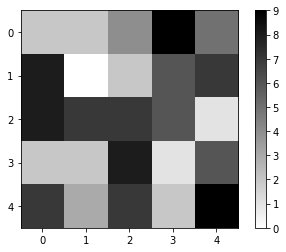

In [23]:
plt.imshow(a, vmin=0, vmax=9, cmap='gray_r')
plt.colorbar()

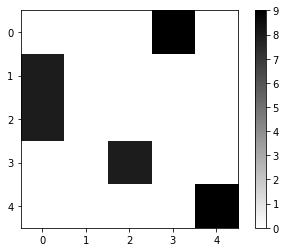

In [25]:
plt.imshow(np.where(a<8, 0, a), vmin=0, vmax=9, cmap='gray_r')
plt.colorbar()